In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten, Dense, Dropout

In [3]:
import pandas as pd
import numpy as np

In [4]:
df_train=pd.read_csv("mnist/train.csv")
df_test=pd.read_csv("mnist/test.csv")
df_train.shape

(42000, 785)

In [5]:
x_train=df_train.iloc[:,1:]
y_train=df_train.iloc[:,0]
x_test=df_test

In [6]:
x_train=x_train.values
y_train=y_train.values
x_test=x_test.values
x_train.shape, x_test.shape, y_train.shape

((42000, 784), (28000, 784), (42000,))

In [7]:
x_train=x_train.reshape((len(x_train),28,28,1)) ########  len(x_train) ki jgh x_train[0] nhi rakhna yrr
x_test=x_test.reshape(len(x_test),28,28,1)
x_train.shape, x_test.shape, y_train.shape

((42000, 28, 28, 1), (28000, 28, 28, 1), (42000,))

In [8]:
y_train=keras.utils.to_categorical(y_train,num_classes=10)

In [9]:
y_train.shape

(42000, 10)

In [10]:
import matplotlib.pyplot as plt

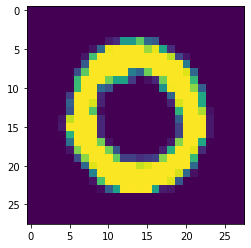

In [11]:
first_image=x_train[1]
first_image=first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [12]:
input_width=28
input_height=28

n_conv1=32
n_conv2=64

conv1_k=5
conv2_k=5

max_pool1_k=2
max_pool2_k=2

n_hidden=1024
n_out=10

# Forward Propagation:

In [13]:
model=Sequential()
model.add(Conv2D(n_conv1,kernel_size=(conv1_k,conv1_k),input_shape=(input_height,input_width,1)))
model.add(MaxPooling2D(pool_size=(max_pool1_k,max_pool1_k)))
model.add(Conv2D(n_conv2,kernel_size=(conv2_k,conv2_k),input_shape=(input_height,input_width,1)))
model.add(MaxPooling2D(pool_size=(max_pool2_k,max_pool2_k)))
model.add(Flatten())  #Flattening the 2D array arrays for fully connected layers
model.add(Dense(n_hidden,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(n_out,activation=tf.nn.softmax))

# Compiling:

In [14]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [15]:
model.fit(x_train,y_train,epochs=10,batch_size=50)

Train on 42000 samples
Epoch 1/10
42000/42000 [==============================] - 33s 790us/sample - loss: 14.5157 - acc: 0.0994
Epoch 2/10
42000/42000 [==============================] - 34s 799us/sample - loss: 14.5151 - acc: 0.0995
Epoch 3/10
42000/42000 [==============================] - 34s 808us/sample - loss: 14.5151 - acc: 0.0995
Epoch 4/10
42000/42000 [==============================] - 34s 808us/sample - loss: 14.5151 - acc: 0.0995
Epoch 5/10
42000/42000 [==============================] - 34s 819us/sample - loss: 14.5151 - acc: 0.0995
Epoch 6/10
42000/42000 [==============================] - 34s 814us/sample - loss: 14.5151 - acc: 0.0995
Epoch 7/10
42000/42000 [==============================] - 34s 810us/sample - loss: 14.5151 - acc: 0.0995
Epoch 8/10
42000/42000 [==============================] - 34s 802us/sample - loss: 14.5151 - acc: 0.0995
Epoch 9/10
42000/42000 [==============================] - 33s 787us/sample - loss: 14.5151 - acc: 0.0995
Epoch 10/10
42000/42000 [=======

In [16]:
# model.save("CNNbyKeras.h5")

In [17]:
# model=keras.models.load_model("CNNbyKeras.h5")

In [18]:
predictions=model.predict(x_test)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


In [19]:
ans=np.argmax(predictions,axis=1)
ans

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


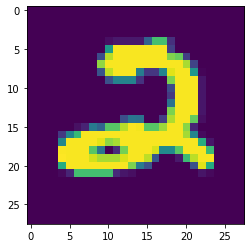

In [20]:

plt.imshow(x_test[0].reshape((28,28)))
print(predictions[0])

In [21]:
# score=model.evaluate(x_test,ans)

In [22]:
# score

In [23]:
# x_test.shape

In [24]:
# ans[0:100]